# Term2 Sprint18 データセット作成

目的
- データセットを作成し学習する
- データ拡張を行う

自作のデータセットを作り、さらにデータ拡張も行なっていく。モデルはKeras組み込みのVGG16を使用する。

<参考>
https://qiita.com/yottyann1221/items/20a9c8a7a02edc7cd3d1

In [0]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [0]:
import os
from keras.applications.vgg16 import VGG16
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, Model
from keras.layers import Input, Activation, Dropout, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
import numpy as np
import time

Using TensorFlow backend.


In [0]:
# 分類するクラス
classes = ["cat","dog"]
nb_classes = len(classes)
#画像の大きさを設定
img_width, img_height = 224, 224

# トレーニング用とバリデーション用の画像格納先（パスは自分で設定してください）
train_data_dir = '/content/drive/My Drive/Colab Notebooks/CatDog'
validation_data_dir = '/content/drive/My Drive/Colab Notebooks/test'

#トレーニングデータ用の画像数
nb_train_samples = 10
#バリデーション用の画像数
nb_validation_samples = 10
#バッチサイズ
batch_size = 10
#エポック数
nb_epoch = 35

In [0]:
# トレーンング用、バリデーション用データを生成するジェネレータ作成
train_datagen = ImageDataGenerator(
  rescale=1.0 / 255,
  #画像の水増し
  zoom_range=0.2,
  horizontal_flip=True,
  channel_shift_range=5.0
)

validation_datagen = ImageDataGenerator(rescale=1.0 / 255)

In [0]:
train_generator = train_datagen.flow_from_directory(
  train_data_dir,
  target_size=(img_width, img_height),
  color_mode='rgb',
  classes=classes,
  class_mode='categorical',
  batch_size=batch_size,
  shuffle=True)

validation_generator = validation_datagen.flow_from_directory(
  validation_data_dir,
  target_size=(img_width, img_height),
  color_mode='rgb',
  classes=classes,
  class_mode='categorical',
  batch_size=batch_size,
  shuffle=True)

Found 10 images belonging to 2 classes.
Found 10 images belonging to 2 classes.


In [0]:
# VGG16のロード。FC層は不要なので include_top=False
input_tensor = Input(shape=(img_width, img_height, 3))
vgg16 = VGG16(include_top=False, weights='imagenet', input_tensor=input_tensor)

# VGG16の図の緑色の部分（FC層）の作成
top_model = Sequential()
top_model.add(Flatten(input_shape=vgg16.output_shape[1:]))
top_model.add(Dense(256, activation='relu'))
top_model.add(Dropout(0.5))
top_model.add(Dense(nb_classes, activation='softmax'))

# VGG16とFC層を結合してモデルを作成（完成図が上の図）
vgg_model = Model(input=vgg16.input, output=top_model(vgg16.output))

# VGG16の図の青色の部分は重みを固定（frozen）
for layer in vgg_model.layers[:15]:
    layer.trainable = False

# 多クラス分類を指定
vgg_model.compile(loss='categorical_crossentropy',
          optimizer=optimizers.SGD(lr=1e-3, momentum=0.9),
          metrics=['accuracy'])





58892288/58889256 [==============================] - 5s 0us/step







Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.




/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("se...)`
  if sys.path[0] == '':


In [0]:
# Fine-tuning
history = vgg_model.fit_generator(
    train_generator,
    samples_per_epoch=nb_train_samples,
    nb_epoch=nb_epoch,
    validation_data=validation_generator,
    nb_val_samples=nb_validation_samples)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=<keras_pre..., steps_per_epoch=1, epochs=35, validation_steps=10)`
  




Epoch 1/35
1/1 [==============================] - 13s 13s/step - loss: 0.9076 - acc: 0.5000 - val_loss: 0.8595 - val_acc: 0.3000
Epoch 2/35
1/1 [==============================] - 1s 1s/step - loss: 0.6333 - acc: 0.7000 - val_loss: 0.6742 - val_acc: 0.5000
Epoch 3/35
1/1 [==============================] - 1s 1s/step - loss: 0.4090 - acc: 0.7000 - val_loss: 0.5839 - val_acc: 0.7000
Epoch 4/35
1/1 [==============================] - 1s 1s/step - loss: 0.5045 - acc: 0.7000 - val_loss: 0.4772 - val_acc: 0.9000
Epoch 5/35
1/1 [==============================] - 1s 1s/step - loss: 0.2208 - acc: 1.0000 - val_loss: 0.4217 - val_acc: 0.9000
Epoch 6/35
1/1 [==============================] - 1s 1s/step - loss: 0.6791 - acc: 0.6000 - val_loss: 0.6337 - val_acc: 0.7000
Epoch 7/35
1/1 [==============================] - 1s 1s/step - loss: 0.2258 - acc: 0.9000 - val_loss: 0.7446 - val_acc: 0.7000
Epoch 8/35
1/1 [==============================] - 1s 1s/step - loss: 0.4523 - acc: 0.8000 - val_loss: 0.410

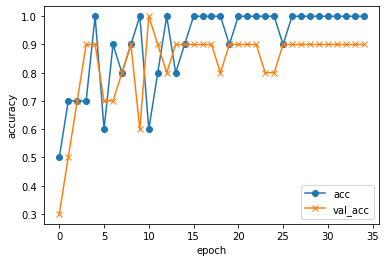

In [0]:
# 学習結果を描写
import matplotlib.pyplot as plt

#acc, val_accのプロット
plt.plot(history.history["acc"], label="acc", ls="-", marker="o")
plt.plot(history.history["val_acc"], label="val_acc", ls="-", marker="x")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(loc="best")
#Final.pngという名前で、結果を保存
plt.savefig('Final.png')
plt.show()

In [0]:
#resultsディレクトリを作成
result_dir = 'results'
if not os.path.exists(result_dir):
    os.mkdir(result_dir)

# 重みを保存
vgg_model.save_weights(os.path.join(result_dir, 'Final.h5'))

# 作成したモデルを保存
# vgg_model.save('VGGtake1.h5')

In [0]:
from keras.preprocessing import image

# 画像を読み込んで予測する
def img_predict(filename):
    # 画像を読み込んで4次元テンソルへ変換
    img = image.load_img(filename, target_size=(img_height, img_width))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    # 学習時にImageDataGeneratorのrescaleで正規化したので同じ処理が必要
    # これを忘れると結果がおかしくなるので注意
    x = x / 255.0   
    #表示
    plt.imshow(img)
    plt.show()
    # 指数表記を禁止にする
    np.set_printoptions(suppress=True)

    #画像の人物を予測    
    pred = vgg_model.predict(x)[0]
    #結果を表示する
    print("　　cat': 0, 'dog': 1")
    print(pred*100)

In [0]:
import glob
#テスト用の画像が入っているディレクトリのpathを()に入れてください
test = glob.glob('/content/drive/My Drive/Colab Notebooks/VGG16test2/*')

## 画像水増し(ImageDataGenerator)前のスコア

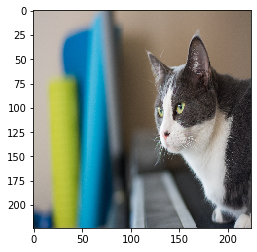

　　cat': 0, 'dog': 1
[52.465553 47.534447]


In [0]:
img_predict(test[0])

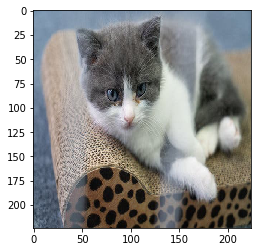

　　cat': 0, 'dog': 1
[37.498558 62.501442]


In [0]:
img_predict(test[1])

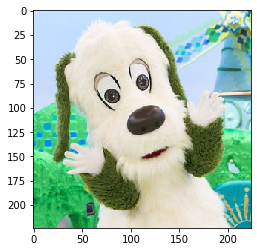

　　cat': 0, 'dog': 1
[47.43205 52.56795]


In [0]:
img_predict(test[3])

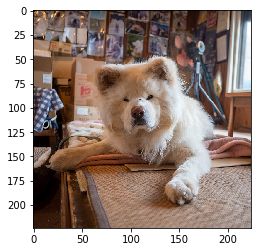

　　cat': 0, 'dog': 1
[14.217855 85.78215 ]


In [0]:
img_predict(test[4])

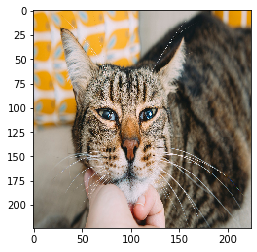

　　cat': 0, 'dog': 1
[98.65473    1.3452706]


In [0]:
img_predict(test[5])

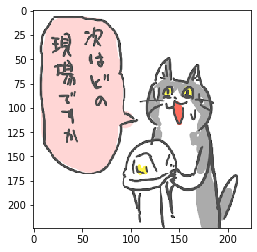

　　cat': 0, 'dog': 1
[ 8.126618 91.873375]


In [0]:
img_predict(test[6])

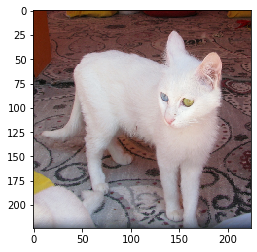

　　cat': 0, 'dog': 1
[47.007298 52.992702]


In [0]:
img_predict(test[7])

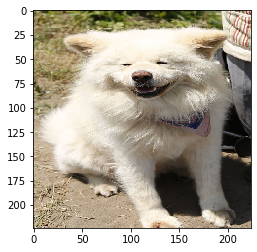

　　cat': 0, 'dog': 1
[ 3.0663745 96.933624 ]


In [0]:
img_predict(test[8])

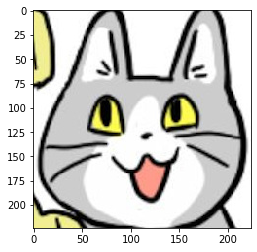

　　cat': 0, 'dog': 1
[64.65401  35.345985]


In [0]:
test2 = glob.glob('/content/drive/My Drive/Colab Notebooks/VGG16test/shigotocat_2.jpeg')
img_predict(test2[0])

## 画像水増し後

  zoom_range=0.2,

  horizontal_flip=True,
  
  channel_shift_range=100

  上記を設定

In [0]:
test3 = glob.glob('/content/drive/My Drive/Colab Notebooks/VGG16test/*')

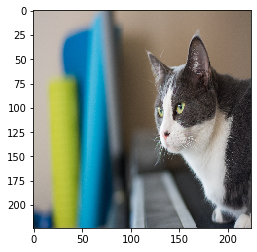

　　cat': 0, 'dog': 1
[ 8.642897 91.3571  ]


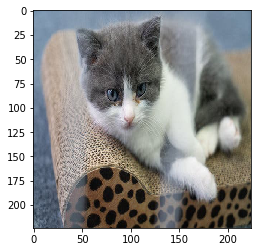

　　cat': 0, 'dog': 1
[ 4.2234516 95.77654  ]


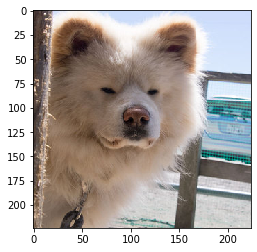

　　cat': 0, 'dog': 1
[ 0.00028065 99.99971   ]


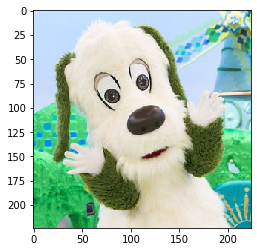

　　cat': 0, 'dog': 1
[ 5.745605 94.254395]


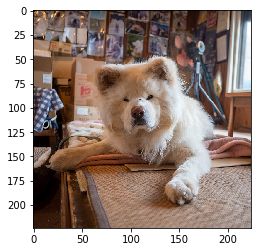

　　cat': 0, 'dog': 1
[ 0.08297536 99.91703   ]


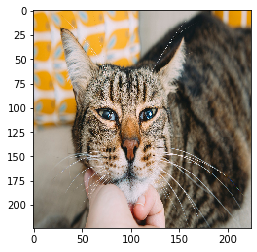

　　cat': 0, 'dog': 1
[99.39702    0.6029823]


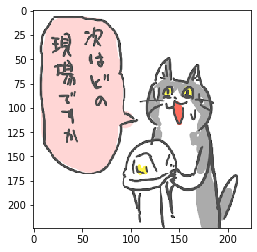

　　cat': 0, 'dog': 1
[14.2106695 85.78934  ]


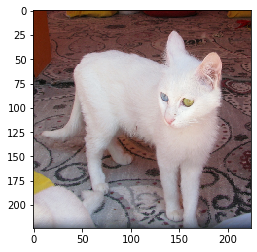

　　cat': 0, 'dog': 1
[ 0.40525842 99.59474   ]


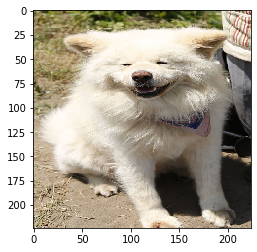

　　cat': 0, 'dog': 1
[ 0.0065376 99.99347  ]


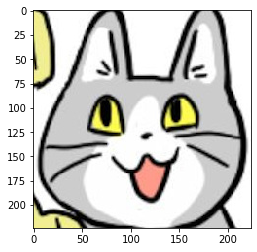

　　cat': 0, 'dog': 1
[98.11891    1.8810802]


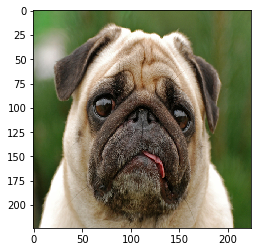

　　cat': 0, 'dog': 1
[48.88402  51.115982]


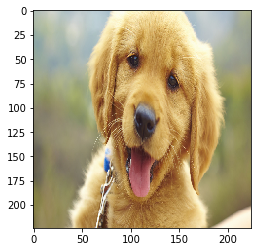

　　cat': 0, 'dog': 1
[ 0.47567576 99.52432   ]


In [0]:
for i in range(12):
  img_predict(test3[i])

## DIC提供のテスト素材

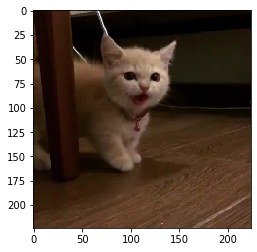

　　cat': 0, 'dog': 1
[22.755823 77.24418 ]


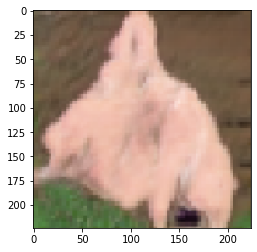

　　cat': 0, 'dog': 1
[ 0.7308518 99.26914  ]


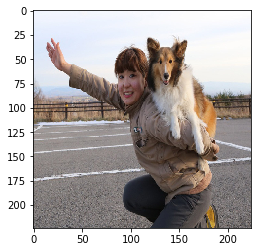

　　cat': 0, 'dog': 1
[ 4.4132824 95.586716 ]


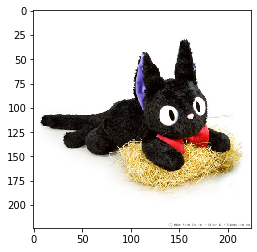

　　cat': 0, 'dog': 1
[99.37475     0.62524927]


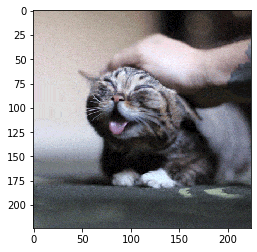

　　cat': 0, 'dog': 1
[55.481    44.518997]


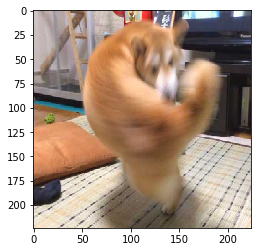

　　cat': 0, 'dog': 1
[ 7.6681323 92.33187  ]


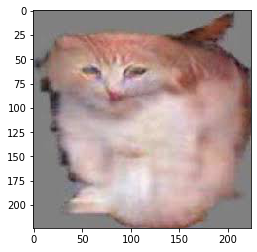

　　cat': 0, 'dog': 1
[ 7.4874682 92.51253  ]


In [0]:
for i in range(7):
  img_predict(test[i])

## 物体検出データセットの用意

バウンディングボックスのアノテーションを行い物体検出のためのデータセットを作成。

今回は、labelImgを使用して座標を取得。

xmlデータから必要情報を抽出してみる。

In [0]:
import xml.etree.ElementTree as ET

# XMLファイルを解析
tree = ET.parse('dog_100.xml')

# XMLを取得
root = tree.getroot()


In [0]:
# 要素のデータを1つずつ取得
count = 0
for i in root.iter():
  print(count, ":", i.text)
  count +=1

0 : 
	
1 : dog
2 : dog_100.jpg
3 : /Users/ishizucat/Downloads/cats_image/downloads/dog/dog_100.jpg
4 : 
		
5 : Unknown
6 : 
		
7 : 1200
8 : 675
9 : 3
10 : 0
11 : 
		
12 : dog
13 : Unspecified
14 : 0
15 : 0
16 : 
			
17 : 533
18 : 33
19 : 934
20 : 504


In [0]:
print("path", root[2].text)

child = root[6]
print(child[4][0].tag)
print(child[4][0].text)

path /Users/ishizucat/Downloads/cats_image/downloads/dog/dog_100.jpg
xmin
533


In [0]:
#XMLデータの必要情報を抜き出す
annotation = []
for i in range(5):
  tmp = []
  filepath = "dog_10"+str(i)+".xml"
  tree = ET.parse(filepath)
  root = tree.getroot()
  tmp.append(root[2].text)
  tmp.append(root[6][4][0].text)  #xmin
  tmp.append(root[6][4][1].text)  #ymin
  tmp.append(root[6][4][2].text)  #xmax
  tmp.append(root[6][4][3].text)  #ymax
  annotation.append(tmp)


In [0]:
for i in annotation:
  print(i)

['/Users/ishizucat/Downloads/cats_image/downloads/dog/dog_100.jpg', '533', '33', '934', '504']
['/Users/ishizucat/Downloads/cats_image/downloads/dog/dog_101.jpg', '236', '62', '331', '155']
['/Users/ishizucat/Downloads/cats_image/downloads/dog/dog_102.jpg', '363', '219', '842', '625']
['/Users/ishizucat/Downloads/cats_image/downloads/dog/dog_103.jpg', '369', '27', '703', '434']
['/Users/ishizucat/Downloads/cats_image/downloads/dog/dog_104.jpg', '430', '104', '917', '765']


## ボックスの可視化

https://github.com/albumentations-team/albumentations/blob/master/notebooks/example_bboxes.ipynb

In [5]:
!pip install -U git+https://github.com/albu/albumentations

  Cloning https://github.com/albu/albumentations to /tmp/pip-req-build-myuk4l6m
  Running command git clone -q https://github.com/albu/albumentations /tmp/pip-req-build-myuk4l6m
     |████████████████████████████████| 634kB 4.9MB/s 
  Created wheel for albumentations: filename=albumentations-0.4.4-cp36-none-any.whl size=61973 sha256=f6d31538e7935df2810aac00403bf3553a826a78c86f5ff5fd3cd24d05ff85b2
  Stored in directory: /tmp/pip-ephem-wheel-cache-8_1iltqo/wheels/45/8b/e4/2837bbcf517d00732b8e394f8646f22b8723ac00993230188b
  Created wheel for imgaug: filename=imgaug-0.2.6-cp36-none-any.whl size=654020 sha256=514c69085f617dd42ff180324c18cafde1f127d7bead98d25e5f534045b2cca6
  Stored in directory: /root/.cache/pip/wheels/97/ec/48/0d25896c417b715af6236dbcef8f0bed136a1a5e52972fc6d0
Successfully built albumentations imgaug
  Found existing installation: imgaug 0.2.9
    Uninstalling imgaug-0.2.9:
      Successfully uninstalled imgaug-0.2.9
  Found existing installation: albumentations 0.1.12
  

In [0]:
%matplotlib inline
from urllib.request import urlopen
import os

import numpy as np
import cv2
from matplotlib import pyplot as plt

from albumentations import (
    BboxParams,
    HorizontalFlip,
    VerticalFlip,
    Resize,
    CenterCrop,
    RandomCrop,
    Crop,
    Compose
)

In [0]:
def download_image(url):
  #デフォルトでは、data = urlopen(url).read() 
    data = open(url, 'rb').read()
    data = np.frombuffer(data, np.uint8)
    image = cv2.imdecode(data, cv2.IMREAD_COLOR)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

In [0]:
# Functions to visualize bounding boxes and class labels on an image. 
# Based on https://github.com/facebookresearch/Detectron/blob/master/detectron/utils/vis.py

BOX_COLOR = (255, 0, 0)
TEXT_COLOR = (255, 255, 255)


def visualize_bbox(img, bbox, class_id, class_idx_to_name, color=BOX_COLOR, thickness=2):
    x_min, y_min, w, h = bbox
    x_min, x_max, y_min, y_max = int(x_min), int(w), int(y_min), int(h)
    cv2.rectangle(img, (x_min, y_min), (x_max, y_max), color=color, thickness=thickness)
    class_name = class_idx_to_name[class_id]
    ((text_width, text_height), _) = cv2.getTextSize(class_name, cv2.FONT_HERSHEY_SIMPLEX, 0.35, 1)    
    cv2.rectangle(img, (x_min, y_min - int(1.3 * text_height)), (x_min + text_width, y_min), BOX_COLOR, -1)
    cv2.putText(img, class_name, (x_min, y_min - int(0.3 * text_height)), cv2.FONT_HERSHEY_SIMPLEX, 0.35,TEXT_COLOR, lineType=cv2.LINE_AA)
    return img


def visualize(annotations, category_id_to_name):
    img = annotations['image'].copy()
    for idx, bbox in enumerate(annotations['bboxes']):
        img = visualize_bbox(img, bbox, annotations['category_id'][idx], category_id_to_name)
    plt.figure(figsize=(12, 12))
    plt.imshow(img)

In [0]:
image = download_image("dog_100.jpg")


In [11]:
print(annotation[0][1:])

['533', '33', '934', '504']


In [0]:
# Annotations for image 386298 from COCO http://cocodataset.org/#explore?id=386298
annotations = {'image': image, 'bboxes': [annotation[0][1:]], 'category_id': [18]}
category_id_to_name = {17: 'cat', 18: 'dog'}

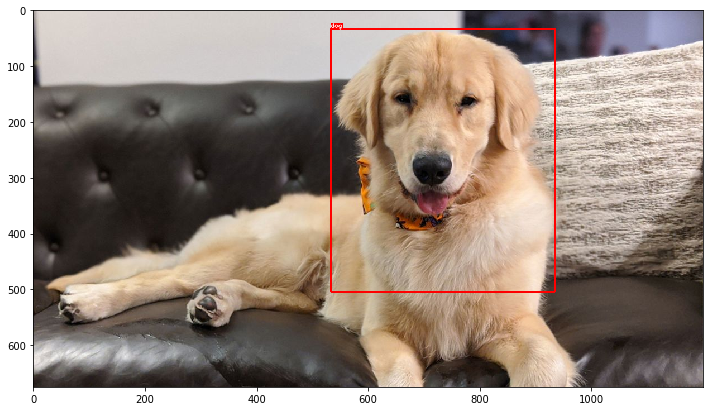

In [13]:
visualize(annotations, category_id_to_name)

## DataAugmentation

In [0]:
#formatはpascal_vocを使用
def get_aug(aug, min_area=0., min_visibility=0.):
    return Compose(aug, bbox_params=BboxParams(format='pascal_voc', min_area=min_area, 
                                               min_visibility=min_visibility, label_fields=['category_id']))

In [76]:
#座標のfloat化
def fanc(num):
  return float(num)
anno = list(map(fanc, annotation[0][1:]))
anno

[533.0, 33.0, 934.0, 504.0]

In [0]:
annotations = {'image': image, 'bboxes': [anno], 'category_id': [18]}
category_id_to_name = {18: 'dog'}

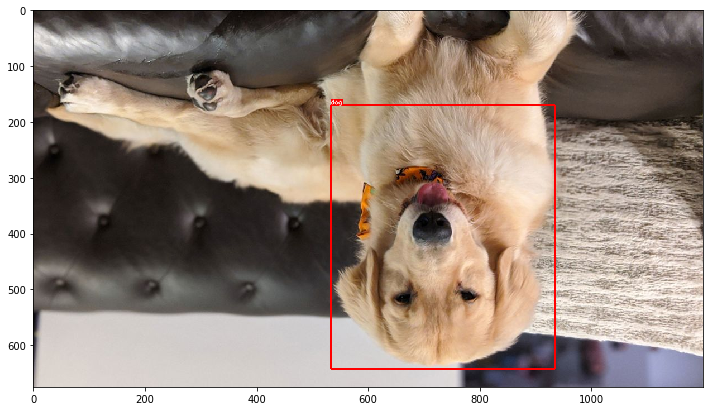

In [80]:
aug = get_aug([VerticalFlip(p=1)])
augmented = aug(**annotations)
visualize(augmented, category_id_to_name)

## 【補足】theanoバックエンド

In [0]:
#バックエンドをtheanoに変更　kerasのimport前に行う必要あり
import os
os.environ["KERAS_BACKEND"] = "theano"
